#  Определение перспективного тарифа для телеком-компании

Дана выборка клиетнов компании «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год.

Цель работы - определить какой тариф лучше.

Тариф «Смарт»   
Ежемесячная плата: 550 рублей   
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика   
Стоимость услуг сверх тарифного пакета: минута разговора: 3 рубля сообщение: 3 рубля 1 Гб интернет-трафика: 200 рублей

Тариф «Ультра»  
Ежемесячная плата: 1950 рублей   
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика   
Стоимость услуг сверх тарифного пакета: минута разговора: 1 рубль сообщение: 1 рубль 1 Гб интернет-трафика: 150 рублей

Задачи:  
- Знакомство с данными.  
- Анализ данных выборки.  
- Анализ поведения клиентов.  


Важные примечания:   
«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.



Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

## Выгрузка, знакомство с данными 

In [1]:
import pandas as pd
from scipy import stats as st
import numpy as np


In [2]:
calls =pd.read_csv('/datasets/calls.csv', sep=',') #обзор таблицы звонки 
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [3]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [4]:
internet = pd.read_csv('/datasets/internet.csv', sep=',')
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [5]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [6]:
messages = pd.read_csv('/datasets/messages.csv', sep=',')
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [7]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [8]:
tariffs = pd.read_csv('/datasets/tariffs.csv', sep=',')
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [9]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [10]:
users = pd.read_csv('/datasets/users.csv', sep=',')
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [11]:
users.isna().sum()

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

In [12]:
users.head()


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


Выводы  

В таблице callse 202 607 строк и 4 столбца, пропущенных значений нет. Звонки с нулевой продолжительностью - не ошибочны, это значит, что звонок пропущен. Выявлено, что:   
1.В таблице calls в duration нужно значения в секундном выражении округлить в большую сторону, т.к. по условиям компании если звонок длился всего 1 секунду, будет засчитан как 1 минута. Данные должны быть цельночисленными.  
2.Изменить формат времени, выделить месяц.

В таблице internrt 149 396 строк и 5 столбцов, пропущенных значений нет. Выявлено, что:  
1.Изменить формат времени, выделить месяц.

В таблице messages 123 036 строки и 3 столбца.  
1.Изменить формат времени, выделить месяц.

В таблице users 500  строк и 8 столбцов. Выявлено, что:  
1.Изменить формат времени, выделить месяц.  
2.Имеются пропущенные значения  в столбце churn_date - 462, но данные пропуски не являются ошибочными, это значит,тариф ещё действовал на момент выгрузки данных.

## Подготовка данных

In [13]:
#преобразование файлов 
calls['duration'] = np.ceil(calls['duration']) #округление
calls['duration'] = calls['duration'].astype('int') #изменение типа 


In [14]:
#добавление столбца месяц во все таблицы
calls['month'] = pd.to_datetime(calls['call_date']).dt.month 
messages['month'] = pd.to_datetime(messages['message_date']).dt.month
internet['month'] = pd.to_datetime(internet['session_date']).dt.month


In [15]:
#проработка таблицы звонки, добавление количества звноков, длительности по месяцам
calls = calls.pivot_table(index=['user_id', 'month'],
                            values='duration',
                            aggfunc=('sum', 'count')).reset_index()
calls.columns = ['user_id', 'month', 'call_numbers', 'duration']

In [16]:
calls.head(5)

,user_id,month,call_numbers,duration
0,1000,5,22,159
1,1000,6,43,172
2,1000,7,47,340
3,1000,8,52,408
4,1000,9,58,466


In [17]:
#проработка таблицы сообщений, добавление количества сообщений
messages = messages.pivot_table(index=['user_id', 'month'],
                               values='id',
                               aggfunc=('count')).reset_index()

messages.columns = ['user_id', 'month', 'message_numbers']

In [18]:
messages.head(5)

,user_id,month,message_numbers
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


In [19]:
internet

,Unnamed: 0,id,mb_used,session_date,user_id,month
0,0,1000_0,112.95,2018-11-25,1000,11
1,1,1000_1,1052.81,2018-09-07,1000,9
2,2,1000_2,1197.26,2018-06-25,1000,6
3,3,1000_3,550.27,2018-08-22,1000,8
4,4,1000_4,302.56,2018-09-24,1000,9
...,...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499,10
149392,149392,1499_153,490.13,2018-12-14,1499,12
149393,149393,1499_154,0.00,2018-10-27,1499,10
149394,149394,1499_155,1246.32,2018-11-26,1499,11


In [20]:
internet = internet.pivot_table(index=['user_id', 'month'],
                               values='mb_used',
                               aggfunc=('sum')).reset_index()
internet.columns = ['user_id', 'month', 'mb_used']

In [21]:
internet.head(5)

,user_id,month,mb_used
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91


internet['gb_used'] = (internet['mb_used'] / 1024) #создаем столбец, переводим Мб в Гб для расчета  


In [22]:
#округление internet['gb_used'] = np.ceil(internet['gb_used']) 
internet['mb_used'] = internet['mb_used'].astype('int') #изменение типа 

In [23]:
calls.info()
messages.info()
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3174 entries, 0 to 3173
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   user_id       3174 non-null   int64
 1   month         3174 non-null   int64
 2   call_numbers  3174 non-null   int64
 3   duration      3174 non-null   int64
dtypes: int64(4)
memory usage: 99.3 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2717 entries, 0 to 2716
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   user_id          2717 non-null   int64
 1   month            2717 non-null   int64
 2   message_numbers  2717 non-null   int64
dtypes: int64(3)
memory usage: 63.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   user_id  3203 non-null   int64
 1   month    3203 non-null   

In [24]:
#группировка таблицы звонков calls = calls.groupby(['user_id', 'month']).agg({'duration': 'sum'}).reset_index() 

#группировка таблицы интернет internet = internet.groupby(['user_id', 'month']).agg({'gb_used': 'sum'}).reset_index()

#группировка таблицы сообщений messages = messages.groupby(['user_id', 'month']).agg({'id': 'count'}).rename(columns = {'id': 'messages'}).reset_index()

#объединение таблиц
report = calls.merge(internet, on = ['user_id', 'month'], how = 'outer')\
              .merge(messages, on = ['user_id', 'month'], how = 'outer').fillna(0)
report = report.merge(users, on = 'user_id', how = 'left').merge(tariffs, left_on = 'tariff', 
                                                                 right_on = 'tariff_name', how = 'left')
report.head(5)





,user_id,month,call_numbers,duration,mb_used,message_numbers,age,churn_date,city,first_name,...,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,1000,5,22.0,159.0,2253.0,22.0,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
1,1000,6,43.0,172.0,23233.0,60.0,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
2,1000,7,47.0,340.0,14003.0,75.0,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
3,1000,8,52.0,408.0,14055.0,81.0,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
4,1000,9,58.0,466.0,14568.0,57.0,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra


In [25]:
# Перевод использованного интернет-трафика из мегабайт в гигабайты + округление
report['gb_used'] = np.ceil(report['mb_used'] / 1024)


In [26]:
#функция для расчета затрат помесячно по каждому пользователю.
def revenue(row):
    min_left = 0
    gb_left = 0
    mess_left = 0
    if (row['duration'] - row['minutes_included']) > 0:
        min_left = (row['duration'] - row['minutes_included']) * row['rub_per_minute']
    if (row['gb_used'] - (row['mb_per_month_included']/ 1024)) > 0:
        gb_left = (row['gb_used'] - (row['mb_per_month_included'] / 1024))* row['rub_per_gb']
    if (row['message_numbers'] - row['messages_included']) > 0:
        mess_left = (row['message_numbers'] - row['messages_included']) * row['rub_per_message']
    result = min_left + gb_left+mess_left + row['rub_monthly_fee']
    return result
report['revenue_per_month'] = report.apply(revenue, axis=1)


In [27]:
report.groupby('tariff')['revenue_per_month'].sum()

tariff
smart    2875351.0
ultra    2039100.0
Name: revenue_per_month, dtype: float64

## Анализ данных

### Описание поведения клиентов оператора

In [28]:
report.groupby('tariff')['tariff'].count()

tariff
smart    2229
ultra     985
Name: tariff, dtype: int64

In [29]:
report.describe()

,user_id,month,call_numbers,duration,mb_used,message_numbers,age,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_used,revenue_per_month
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,1251.590230,8.317362,63.038892,451.244866,17207.112943,38.281269,46.641568,341.148102,20067.405103,1266.179216,979.060361,184.676416,2.387057,2.387057,17.299004,1529.076229
std,144.659172,2.905413,33.236368,241.909978,7570.964206,36.148326,16.586109,438.044726,7082.491569,1152.749279,645.539596,23.054986,0.922199,0.922199,7.400584,798.251091
min,1000.000000,1.000000,0.000000,0.000000,0.000000,0.000000,18.000000,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000,0.000000,550.000000
25%,1125.000000,6.000000,40.000000,282.000000,12491.250000,9.000000,32.000000,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000,13.000000,750.000000
50%,1253.000000,9.000000,62.000000,443.000000,16942.500000,30.000000,46.000000,50.000000,15360.000000,500.000000,550.000000,200.000000,3.000000,3.000000,17.000000,1653.500000
75%,1378.750000,11.000000,82.000000,589.000000,21424.000000,57.000000,62.000000,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000,21.000000,1950.000000
max,1499.000000,12.000000,244.000000,1673.000000,49745.000000,224.000000,75.000000,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000,49.000000,6770.000000


В выборке преобладают преставители тарифа smart, т.е. он популярнее. 
Возраст самый разнообразный от 18 до 100, но средний возраст - 46. 
Есть пользователи, которые не звонят, не используют сообщения или интернет 


In [30]:
tariff_using = report.pivot_table(index='tariff', values=['duration', 
                                                        'message_numbers', 
                                                        'gb_used', 'rub_monthly_fee',
                                                        'revenue_per_month'],aggfunc = 'sum')

In [31]:
tariff_using

,duration,gb_used,message_numbers,revenue_per_month,rub_monthly_fee
tariff,,,,,
smart,931577.0,36397.0,74413.0,2875351.0,1225950
ultra,518724.0,19202.0,48623.0,2039100.0,1920750


In [32]:
tariff_using = report.pivot_table(index='tariff', values=['duration', 
                                                        'message_numbers', 
                                                        'gb_used', 'rub_monthly_fee',
                                                        'revenue_per_month'],aggfunc = 'mean')

In [33]:
tariff_using

,duration,gb_used,message_numbers,revenue_per_month,rub_monthly_fee
tariff,,,,,
smart,417.934948,16.328847,33.384029,1289.973531,550
ultra,526.623350,19.494416,49.363452,2070.152284,1950


Абоненты тарифа smart более активны, что обусловлено их количеством (smart - 2229, ultra - 985). Рассмотрев средние данные по каждой активности пользователя видим, что несмотря на количество пользователей в среднее по звонкам, сообщениям и трафику цифры отличаются не координально, но траты за месяц вырастают у пользователей тарифа ultra в 2 раза. 

In [34]:
def city (row):
    if row['city'] == 'Москва':
        return 'Москва'
    else:
        return 'Другой регион'

report['revenue_city'] = report.apply(city, axis = 1) 

 

In [35]:
income_by_city = report.pivot_table(index='revenue_city', 
                                    values=['duration','message_numbers', 'gb_used', 'rub_monthly_fee', 'revenue_per_month'],
                                    aggfunc = 'sum').sort_values(by = 'revenue_per_month', ascending = False)

In [36]:
income_by_city 

,duration,gb_used,message_numbers,revenue_per_month,rub_monthly_fee
revenue_city,,,,,
Другой регион,1163650.0,44570.0,99893.0,3969409.0,2495650
Москва,286651.0,11029.0,23143.0,945042.0,651050


In [37]:
report.groupby('revenue_city')['revenue_city'].count()

revenue_city
Другой регион    2603
Москва            611
Name: revenue_city, dtype: int64

Больше всего представителей из других регионов,доход также больше с регионов. 

### Расчет среднего количества, дисперсии и стандартного отклонения

Как было обозначено выше, тариф smart популяренее - 2 229 пользователей, ultra - 985 пользователей. 


Обзор минут 

In [38]:
smart_tariff = report.query("tariff == 'smart'") #разделение данных по тарифам 
ultra_tariff = report.query("tariff == 'ultra'")

In [39]:
smart_tariff['duration'].describe() # обзор минут по тарифам, , стандартное отклонение 190,31

count    2229.000000
mean      417.934948
std       190.313730
min         0.000000
25%       282.000000
50%       422.000000
75%       545.000000
max      1435.000000
Name: duration, dtype: float64

In [40]:
ultra_tariff['duration'].describe() # обзор минут по тарифам, стандартное отклонение 317,60 

count     985.000000
mean      526.623350
std       317.606098
min         0.000000
25%       284.000000
50%       518.000000
75%       752.000000
max      1673.000000
Name: duration, dtype: float64

In [41]:
var_smart_minutes = np.var(smart_tariff['duration']) #дисперсия 
var_ultra_minutes = np.var(ultra_tariff['duration'])

In [42]:
var_smart_minutes

36203.06665209469

In [43]:
var_ultra_minutes

100771.2236172022

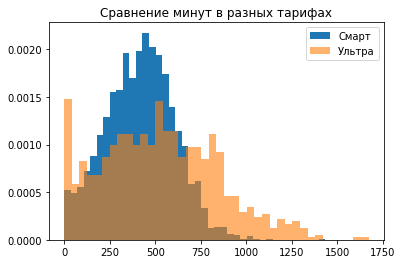

In [44]:
import matplotlib.pyplot as plt
plt.title('Сравнение минут в разных тарифах')
plt.hist(smart_tariff['duration'], bins=40, label='Смарт', density=True)
plt.hist(ultra_tariff['duration'], bins=40, label='Ультра', alpha=0.6, density=True)
plt.legend(loc='upper right')
plt.show()

Из графиков видно, что среднее значение у тарифов отличается (смарт - 417, ультра - 526 ).  
Наблюдаем нормальное распределение:  
- квартили тарифа ультра 1-й -282, медиана - 422,  3-й - 545
- квартили тарифа смарт 1-й -284, медиана - 518,  3-й - 752  

Можно расситать оптимальное для тарифа:  
Для тарифа ультра расчитаем: 526 (среднее значение) + 317 (стандартное отклонение)*3 =  = 1477 минут разговора для пользователей ультра, при округлении 1 500 минут.  

Для тарифа смарт расчитаем: 417 (среднее значение) + 190 (стандартное отклонение)*3 = 987 минут разговора для пользователей смарта, при округлении - 1000 минут. 

Обзор сообщений 

In [45]:
smart_tariff['message_numbers'].describe()

count    2229.000000
mean       33.384029
std        28.227876
min         0.000000
25%        10.000000
50%        28.000000
75%        51.000000
max       143.000000
Name: message_numbers, dtype: float64

In [46]:
ultra_tariff['message_numbers'].describe()

count    985.000000
mean      49.363452
std       47.804457
min        0.000000
25%        6.000000
50%       38.000000
75%       79.000000
max      224.000000
Name: message_numbers, dtype: float64

In [47]:
var_smart_messages = np.var(smart_tariff['message_numbers'])
var_ultra_messages = np.var(ultra_tariff['message_numbers'])

In [48]:
var_smart_messages

796.455482917076

In [49]:
var_ultra_messages

2282.946075394882

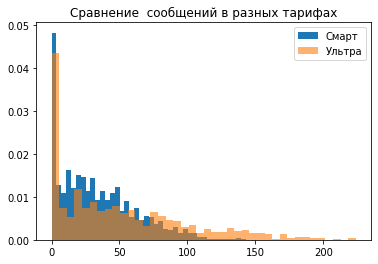

In [50]:
plt.title('Сравнение  сообщений в разных тарифах')
plt.hist(smart_tariff['message_numbers'], bins=40, label='Смарт', density=True)
plt.hist(ultra_tariff['message_numbers'], bins=40, label='Ультра', alpha=0.6, density=True)
plt.legend(loc='upper right')
plt.show()

По графикам оба распределения смещены влево.  Разброс намного больш у тарифа ультра, что допустмо тарифом, но максимального, допустимого лимита не превышает и даже не  приближается к нему. 

Можно расситать оптимальное для тарифа: 

для пользователей тарифа ультра можно установить в 49 (среднее значение) + 47 (стандартное отклонение)*3 = 190 ,округляем до 200.

для пользователей смарт: 33 (среднее значение) + 28 (стандартное отклонение)*3  = 116, округляем до 120
 

Обзр интерент-трафика

In [51]:
smart_tariff['gb_used'].describe()

count    2229.000000
mean       16.328847
std         5.747061
min         0.000000
25%        13.000000
50%        17.000000
75%        20.000000
max        38.000000
Name: gb_used, dtype: float64

In [52]:
ultra_tariff['gb_used'].describe()

count    985.000000
mean      19.494416
std        9.853511
min        0.000000
25%       12.000000
50%       19.000000
75%       27.000000
max       49.000000
Name: gb_used, dtype: float64

In [53]:
var_smart_gb_used = np.var(smart_tariff['gb_used'])
var_ultra_gb_used = np.var(ultra_tariff['gb_used'])

In [54]:
var_smart_gb_used

33.013887454837445

In [55]:
var_ultra_gb_used

96.99311602978692

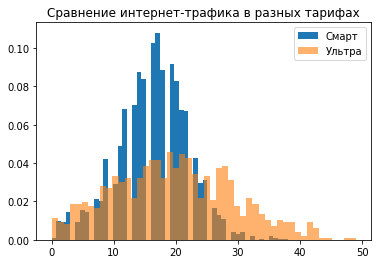

In [56]:
plt.title('Сравнение интернет-трафика в разных тарифах')
plt.hist(smart_tariff['gb_used'], bins=50, label='Смарт', density=True)
plt.hist(ultra_tariff['gb_used'], bins=50, label='Ультра', density=True, alpha=0.6)
plt.legend(loc='upper right')
plt.show()

Распределение по графикам каждого тарифа - является нормальны.
 
квартили тарифа ультра 1-й -12, медиана - 19, 3-й - 27  
квартили тарифа смарт 1-й -13, медиана - 17, 3-й - 20


В среднем пользователи не укладываются в лимит обоих тарифов.  
Оптимальный расчет интренет-трафика:  

ультра: 19 (среднее значение) + 9 (стандартное отклонение)*3 = 46 Гб (по тарифу 30 Гб интернет-трафика)  
смарт: 16 (среднее значение) + 5 (стандартное отклонение)*3 = 31 Гб  ( по тарифу 15 Гб интернет-трафика)


Что является выше заявленных в тарифе лимитов 

Из анализа результатов выявлено, тарифы допустипо изменить по количеству предлагаемых лимитов, уменьшить или увеличить. 


### Проверка гипотиз 


- Нулевая гипотеза H₀: Средняя выручка пользователей тарифов «Ультра» и «Смарт» не различается
- Альтернативная гипотеза H₁: Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается

In [57]:
smart_tariff['revenue_per_month'].mean()


1289.9735307312696

In [58]:
ultra_tariff['revenue_per_month'].mean()

2070.1522842639592

In [59]:
alpha = .05

results = st.ttest_ind(
    smart_tariff['revenue_per_month'], 
    ultra_tariff['revenue_per_month'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.4229814360764067e-160
Отвергаем нулевую гипотезу


Средняя выручка тарифов отличается

- Нулевая гипотеза H₀: Средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов
- Альтернативная гипотеза H₁: Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

In [60]:
report.query("revenue_city == 'Москва'")['revenue_per_month'].mean()

1546.7135842880523

In [61]:
report.query("revenue_city == 'Другой регион'")['revenue_per_month'].mean()

1524.9362274298885

In [62]:
moscow_revenue = report.query("revenue_city == 'Москва'")['revenue_per_month']
other_cities_revenue = report.query("revenue_city == 'Другой регион'")['revenue_per_month']

alpha = .05

results = st.ttest_ind(moscow_revenue, other_cities_revenue)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-значение: 0.5440152911670224
Не получилось отвергнуть нулевую гипотезу


Средняя выручка пользователей из Москвы имеет незначительную разницу от средней выручки пользователей других регионов, поэтому можем считать что выручка пользователей из Москвы не отличается от выручки пользователей из других регионов

## Вывод 

Рассмотрев выборку клиетнов компании «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год, пришла к выводам, что в выборке преобладают преставители тарифа smart, т.е. он популярнее(smart  - 2 229 пользователей, ultra - 985 пользователей), возрасть в выборке самый разнообразный от 18 до 100, но средний - 46. Выявлены пользователи, которые не звонят, не используют сообщения или интернет. Больше всего предаставителей из других региов из Москвы меньше. 

При анализе выявлено, что пользователи в рамках тарифа по некоторым параметрам не укладываются (интернет-трафик), а по некоторым не достигают заданного лимита. Для смарт оптимальным будет - 1000 минут, 120 сообщений, 46 Гб.
Для ультра оптимальным будет - 1500 минут, 200 сообщений и 31 Гб. 
В большинстве выручка по обоим тарифам за счет интерне-трафика. 


В результате были выдвинуты гипотизы:  
•	средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;  
•	средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.  

В результате проведенных Т тестов, определено, что средняя выручка у тарифов отличается и  у тарифа ультра средняя выручка больше, несмотря на гораздо меньшее количество пользователей.  
Также выявлено, что средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов